In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

import sys
sys.path.append('..')

from lib.ChurnEnsemble import ChurnEnsemble
from lib.utils import show_summary

SEED = 42
np.random.seed(SEED)

2024-06-08 14:58:08.538661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
wtte_params = dict(
    features=[
        'plan', 'interval', 'country_es', 'country_mx', 'country_latam', 'gateway_auto',
        'failed', 'usage', 'usage_groups', 'usage_payments', 'momentum'
    ],
    max_sl=24,
    params=dict(
        epochs=30,
        lr=1e-4,
        lr_decay=10,
        stop=0
    )
)
xgb_params = dict(
    features=[
        'employees', 'interval', 'country_es', 'country_mx', 'country_latam', 'gateway_auto',
        'plan', 'usage', 'usage_groups', 'usage_payments', 'usage_avg',
        'paid_periods', 'momentum', 'months', 'failed_ratio'
    ],
    params=dict(
        n=100,
        lr=1e-2,
        max_depth=16,
        stop=30,
        reg_unb=True
    )
)

n_end = 1
n_split = 3
n_start = 0

In [3]:
data = pd.read_csv('../files/churn-data-fit.csv')

for col in ['tp', 'ts', 'te']:
    data[col] = pd.to_datetime(data[col])

show_summary(data)
data

Shape: 201,235 x 40


,id,tp,tgt,tfs,tte,ts,te,employees,mrr,value,...,usage_groups_avg,usage_payments_avg,paid_periods,failed_periods,active_periods,momentum,months,failed_ratio,usage_diff,sid
0,1,2017-07-01,0,4.0,-1.0,2017-03-01,NaT,1,26.58,159.50,...,0.0,0.0,0.0,0.0,1.0,0.00,4.0,NaN,0.00,51b46d18c4de615d0f000019
1,1,2017-08-01,0,5.0,-1.0,2017-03-01,NaT,1,26.58,159.50,...,0.0,0.0,0.0,0.0,2.0,1.20,5.0,NaN,0.00,51b46d18c4de615d0f000019
2,1,2017-09-01,0,6.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-3.14,6.0,0.0,0.00,51b46d18c4de615d0f000019
3,1,2017-10-01,0,7.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-13.60,7.0,0.0,-0.75,51b46d18c4de615d0f000019
4,1,2017-11-01,0,8.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-18.57,8.0,0.0,-0.60,51b46d18c4de615d0f000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201230,11065,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,101.97,101.97,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,66633bcee489710bb6afe3d9
201231,11066,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,40.00,40.00,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,666346aee489710bb6afead3
201232,11067,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,46.62,46.62,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,66634aea1e0bd65a73bf4f2f
201233,11068,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,60.19,60.19,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,666388b3e489710bb6b00925


In [4]:
model = ChurnEnsemble(
    seed=SEED,
    verbose=1,
    path='../files'
)

model

In [5]:
model.data = data

clear_output(wait=True)
show_summary(model.data, model.tgt_col)
model.data.tail()

Shape: 201,235 x 40
    0: 184,502 (91.68%)
    1: 16,733 (8.32%)


,id,tp,tgt,tfs,tte,ts,te,employees,mrr,value,...,usage_groups_avg,usage_payments_avg,paid_periods,failed_periods,active_periods,momentum,months,failed_ratio,usage_diff,sid
201230,11065,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,101.97,101.97,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66633bcee489710bb6afe3d9
201231,11066,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,40.00,40.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,666346aee489710bb6afead3
201232,11067,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,46.62,46.62,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66634aea1e0bd65a73bf4f2f
201233,11068,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,60.19,60.19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,666388b3e489710bb6b00925
201234,11069,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,43.03,43.03,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6663930fe489710bb6b00eac


In [6]:
model.set_params(
    wtte_params=wtte_params,
    xgb_params=xgb_params,
    dt_end=n_end,
    dt_split=n_split,
    dt_start=n_start
)

print(model.dt_end)
print(model.dt_split)
print(model.dt_start)

2024-05-01 00:00:00
2024-02-01 00:00:00
2017-07-01 00:00:00


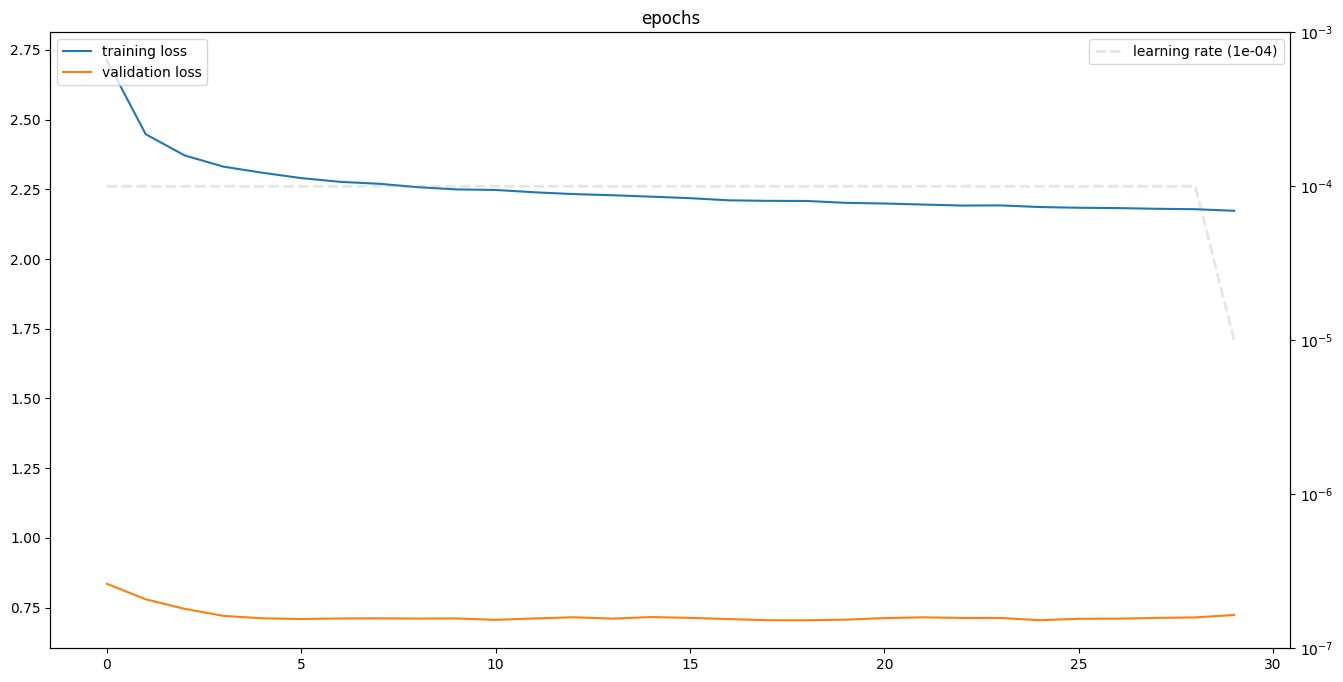

In [7]:
model.fit_wtte()

clear_output(wait=True)
model.wtte.plot_history_eval()

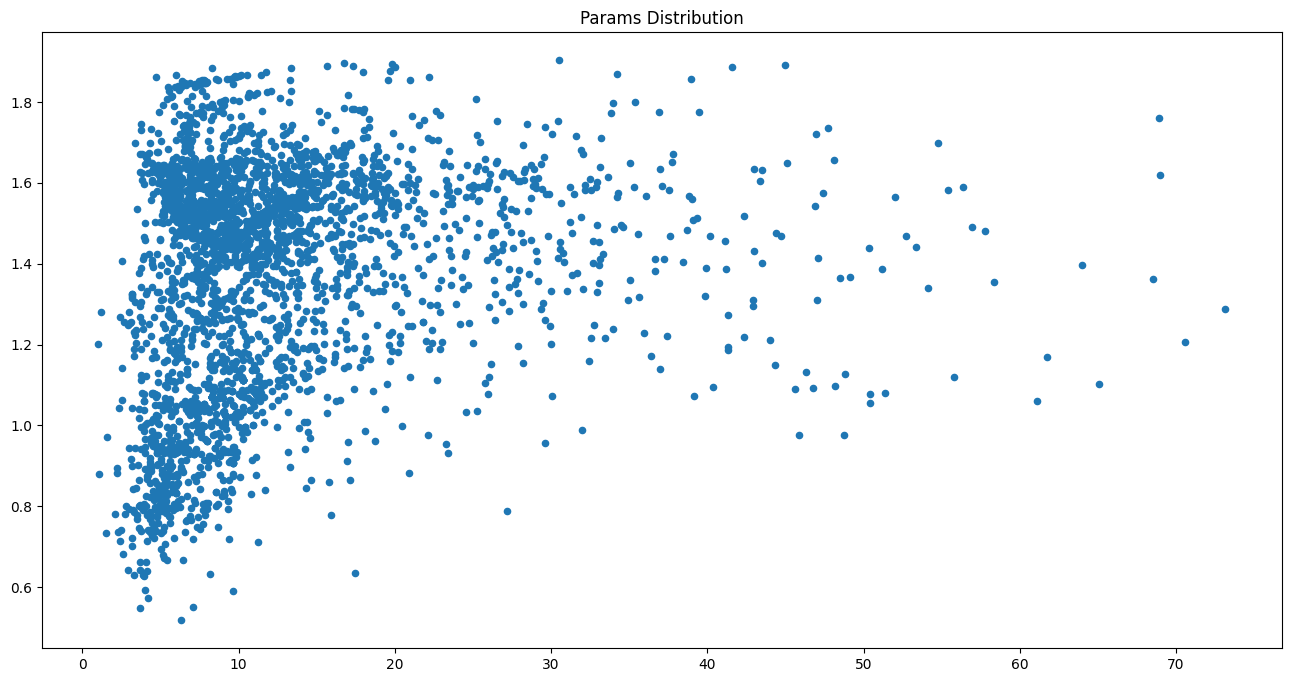

In [8]:
model.wtte.plot_params_dist(model.wtte.results, loc=-1)

In [9]:
n_samples = 12

ids = shuffle(model.wtte.results['id'].tolist())[:n_samples]

print(ids)

[10548, 2241, 5738, 9261, 7600, 10033, 10399, 2037, 10886, 10437, 6551, 10265]


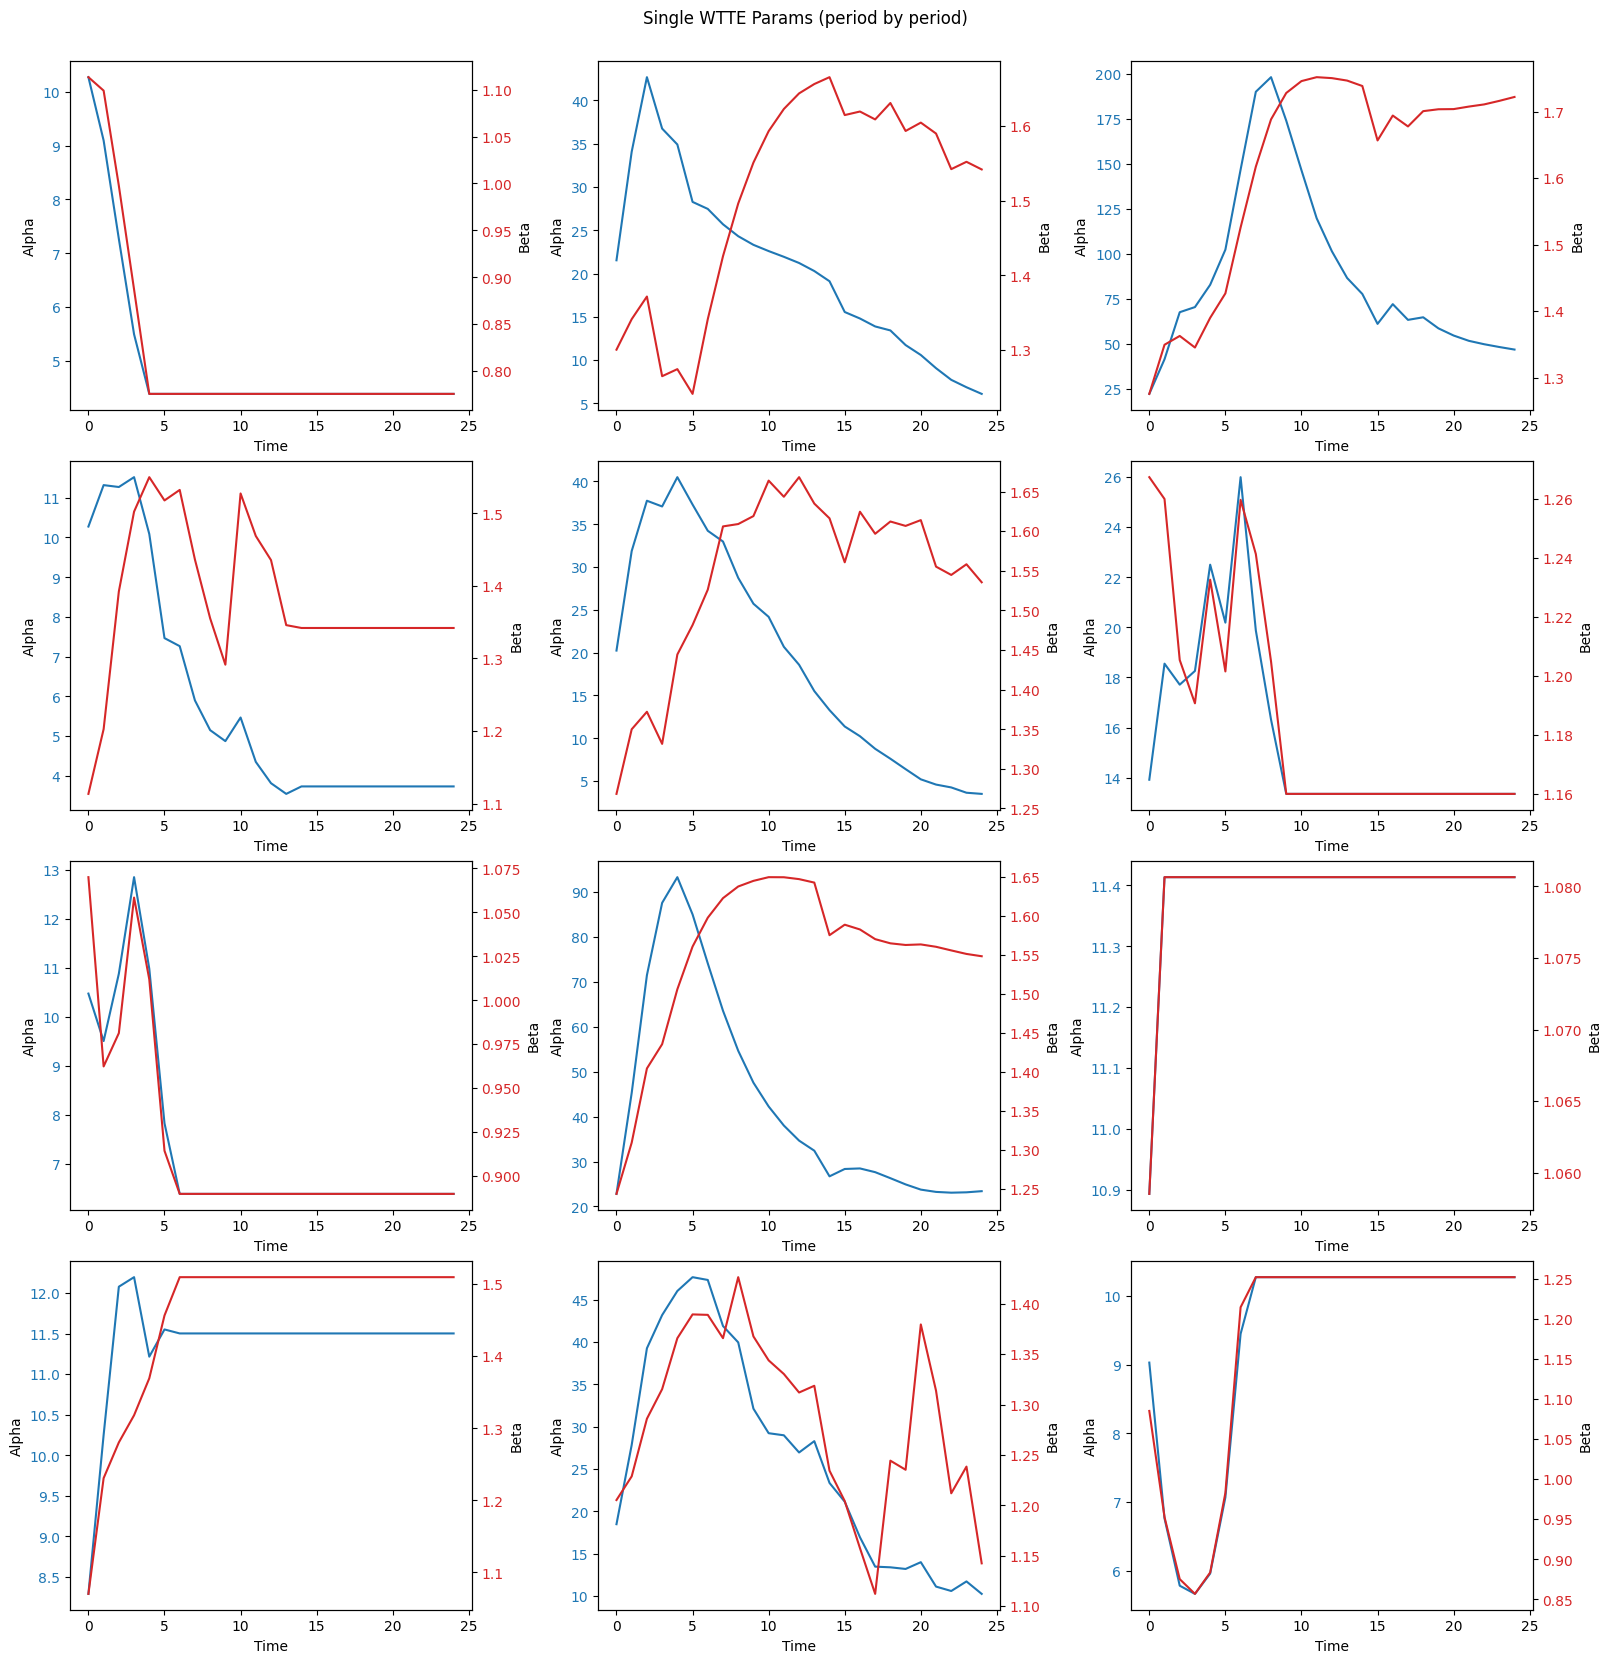

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 16), constrained_layout=True)
axs = axs.flatten()

for i, uid in enumerate(ids):
    model.wtte.plot_single_params(model.wtte.results, id=uid, ax=axs[i])

plt.suptitle('Single WTTE Params (period by period)', y=1.03)

plt.show()

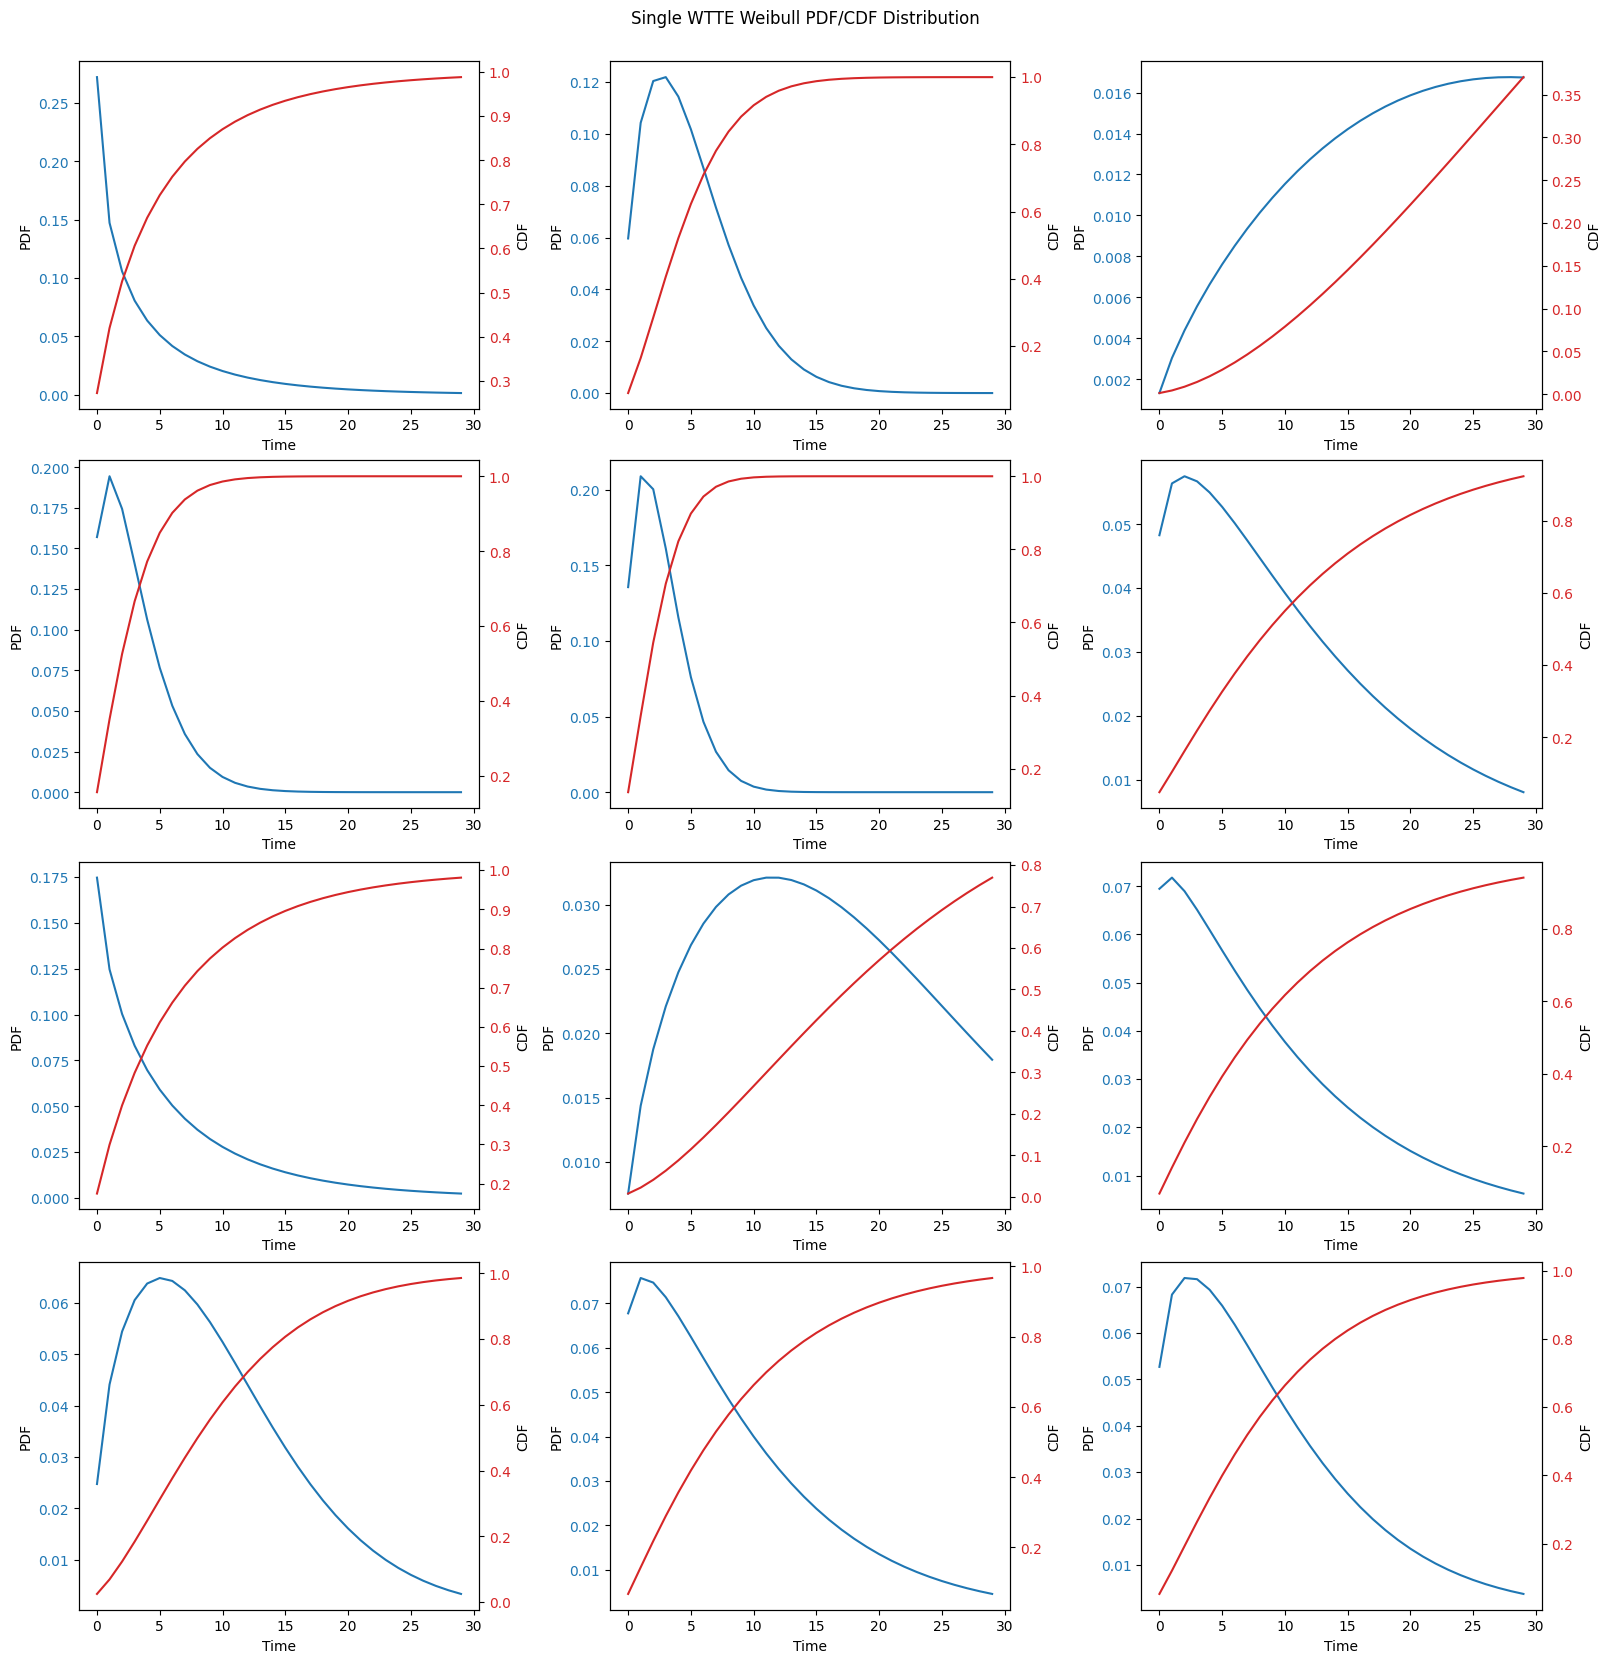

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 16), constrained_layout=True)
axs = axs.flatten()

for i, uid in enumerate(ids):
    model.wtte.plot_weibull(model.wtte.results, id=uid, loc=-1, ax=axs[i])

plt.suptitle('Single WTTE Weibull PDF/CDF Distribution', y=1.03)

plt.show()

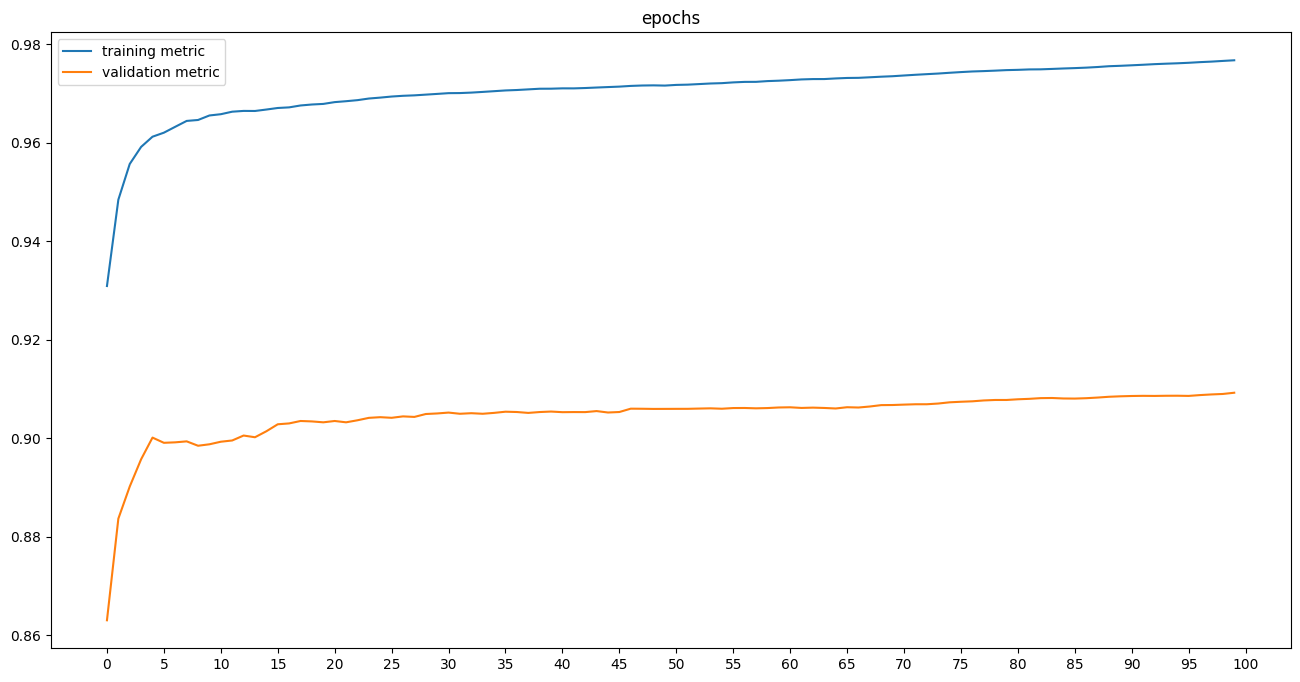

In [12]:
model.fit_xgb()

clear_output(wait=True)
model.xgb.plot_history_eval()

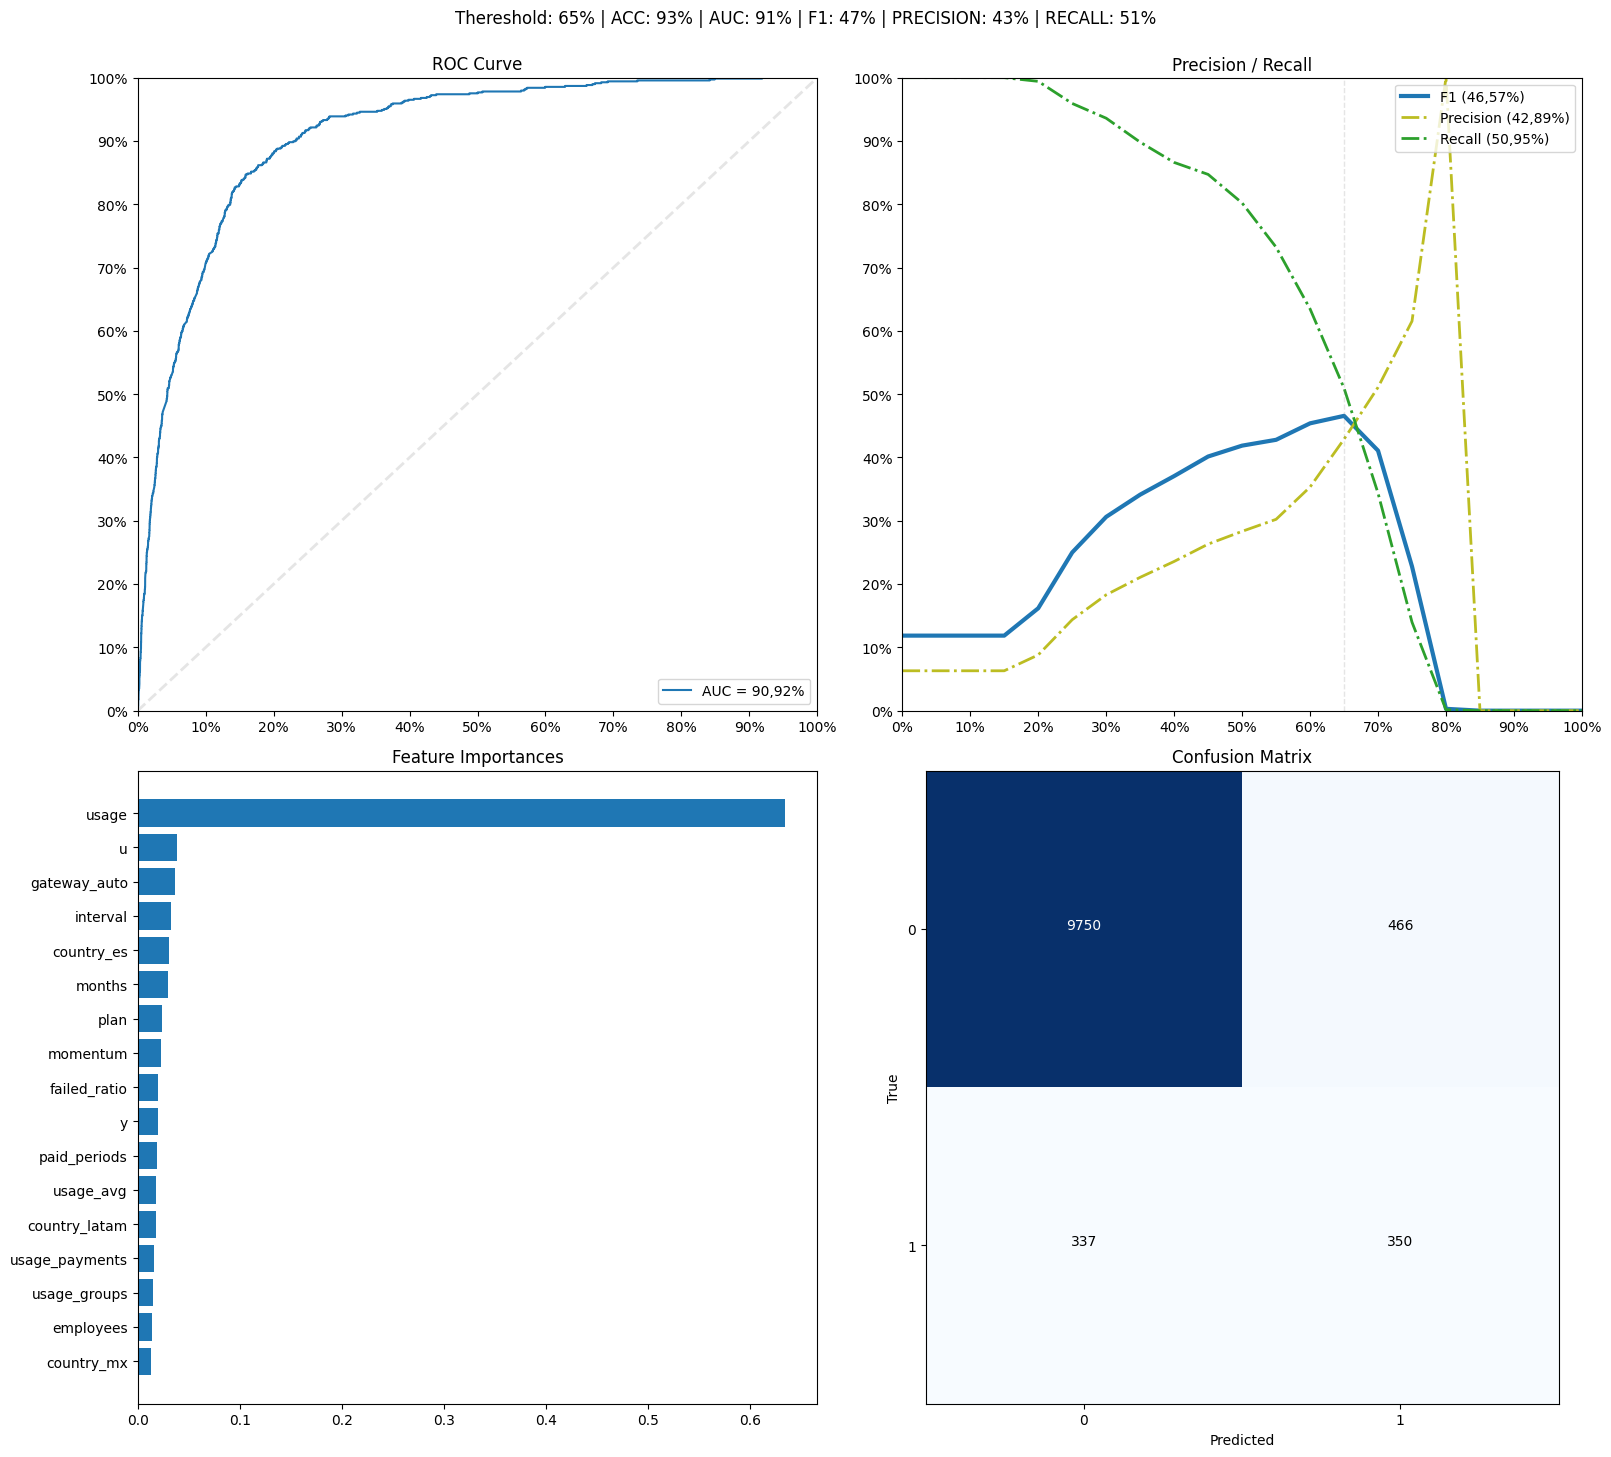

In [13]:
model.xgb.plot_scores(file='xgb-scores.png')

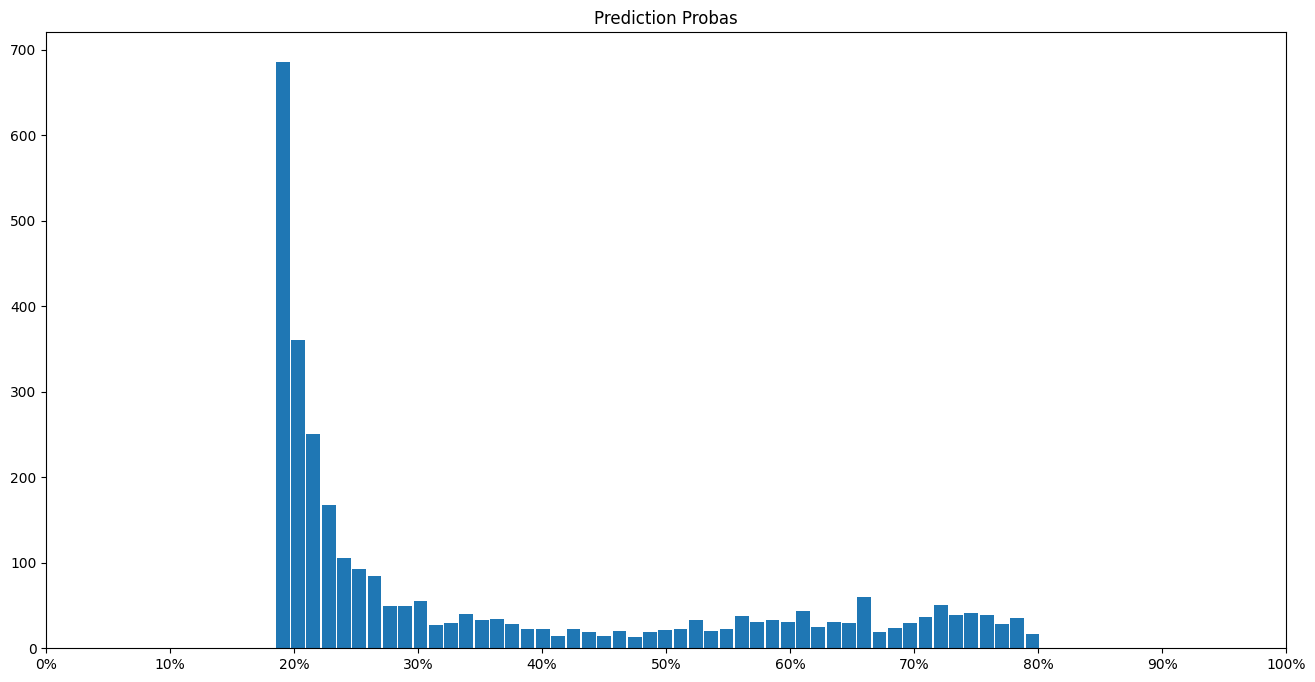

In [14]:
model.xgb.plot_histogram(model.xgb.results, loc=-1, file='xgb-histogram.png')

In [15]:
model.save()